In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [58]:
sns.set_style('whitegrid')

In [59]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [60]:
df = pd.read_csv("../Data/seoul_3.csv")
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,14,1.0,0.969258
1,종로구,2014,27484,905,9,14,1.0,1.004041
2,종로구,2015,27470,906,9,14,1.0,1.004230
3,종로구,2016,26386,846,9,13,1.0,1.017994
4,종로구,2017,25814,689,9,13,1.0,1.026642


----
## 표준화 작업

In [61]:
# 최대값과 최소값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()

col = df.columns[[2,3,4,5]]
x = df[col].values
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.09433107e-01, 6.30367257e-02, 6.00000000e-02, 6.66666667e-02],
       [8.34423578e-02, 6.88836105e-02, 6.00000000e-02, 6.66666667e-02],
       [8.32981365e-02, 6.90663256e-02, 6.00000000e-02, 6.66666667e-02],
       [7.21312826e-02, 5.81034168e-02, 6.00000000e-02, 3.33333333e-02],
       [6.62388100e-02, 2.94171387e-02, 6.00000000e-02, 3.33333333e-02],
       [5.57724599e-02, 2.11949571e-02, 6.00000000e-02, 3.33333333e-02],
       [4.69852585e-02, 2.64936963e-02, 4.00000000e-02, 3.33333333e-02],
       [6.04699556e-02, 1.82715147e-04, 6.00000000e-02, 3.33333333e-02],
       [5.19608954e-02, 0.00000000e+00, 1.00000000e-01, 3.33333333e-02],
       [3.21819661e-02, 9.02612827e-02, 4.00000000e-02, 0.00000000e+00],
       [3.69618741e-02, 9.37328705e-02, 4.00000000e-02, 0.00000000e+00],
       [3.67352405e-02, 7.71057921e-02, 6.00000000e-02, 0.00000000e+00],
       [2.33947648e-02, 7.87502284e-02, 4.00000000e-02, 0.00000000e+00],
       [1.22588155e-02, 5.11602412e-02, 6.00000000e

In [62]:
# 정규화된 데이터프레임 생성
df_norm = pd.DataFrame(x_scaled, columns=col, index=df.index)
# df_2020_norm['시도'] = df['시도']
df_norm.head()

,전출인구,출생아수,산부인과의원수,초등학교수
0,0.109433,0.063037,0.06,0.066667
1,0.083442,0.068884,0.06,0.066667
2,0.083298,0.069066,0.06,0.066667
3,0.072131,0.058103,0.06,0.033333
4,0.066239,0.029417,0.06,0.033333


In [63]:
df_norm['cluster_id'] = df['cluster_id']
df_norm.head()

,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,0.109433,0.063037,0.06,0.066667,1.0
1,0.083442,0.068884,0.06,0.066667,1.0
2,0.083298,0.069066,0.06,0.066667,1.0
3,0.072131,0.058103,0.06,0.033333,1.0
4,0.066239,0.029417,0.06,0.033333,1.0


In [64]:
df_feature = df_norm.iloc[:,:4]
df_feature.head()

,전출인구,출생아수,산부인과의원수,초등학교수
0,0.109433,0.063037,0.06,0.066667
1,0.083442,0.068884,0.06,0.066667
2,0.083298,0.069066,0.06,0.066667
3,0.072131,0.058103,0.06,0.033333
4,0.066239,0.029417,0.06,0.033333


---
## 주성분 분석

In [65]:
df_feature.shape

(225, 4)

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 225개의 데이터중 구별이 확실한 주성분 4개를 선택
pca.fit(df_feature)

PCA(n_components=4)

In [67]:
pca.components_.shape # sample 3개만 들어가있다

(4, 4)

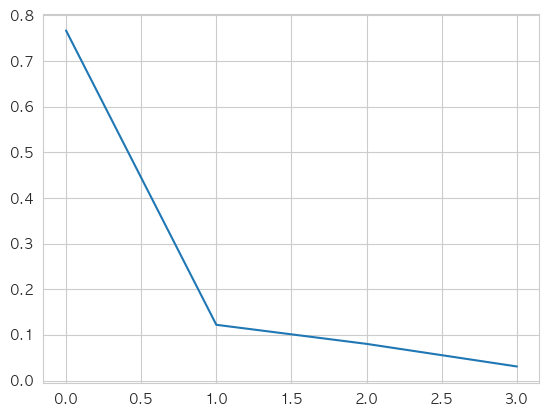

In [68]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

> ### 1 선정

In [69]:
print(pca.explained_variance_ratio_)
print('sum:', sum(pca.explained_variance_ratio_))

[0.76691752 0.12207682 0.08025301 0.03075266]
sum: 1.0


In [70]:
pca = PCA(n_components=1)
pca.fit(df_feature)

PCA(n_components=1)

In [71]:
pca.components_.shape # sample 50개만 들어가있다 # 50개가 뭔지 그래프로 그려보자

(1, 4)

In [72]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 1개의 주성분으로 변경하기
print(df_feature.shape)
km_pca = pca.transform(df_feature)
print(km_pca.shape)
km_pca

(225, 4)
(225, 1)


array([[-5.95912834e-01],
       [-6.07813800e-01],
       [-6.07807346e-01],
       [-6.39003777e-01],
       [-6.56179831e-01],
       [-6.66074567e-01],
       [-6.74861809e-01],
       [-6.73550295e-01],
       [-6.65725712e-01],
       [-6.72067436e-01],
       [-6.67685306e-01],
       [-6.69468507e-01],
       [-6.82597653e-01],
       [-6.95848640e-01],
       [-6.94348536e-01],
       [-6.98629601e-01],
       [-6.99486836e-01],
       [-7.08581660e-01],
       [-4.22245933e-01],
       [-4.29826875e-01],
       [-4.20017807e-01],
       [-4.58869612e-01],
       [-4.98371754e-01],
       [-4.92794624e-01],
       [-5.10764386e-01],
       [-5.03602826e-01],
       [-4.88699226e-01],
       [-1.91252268e-01],
       [-1.90537891e-01],
       [-1.94987010e-01],
       [-2.19986936e-01],
       [-2.31641176e-01],
       [-2.18105640e-01],
       [-2.30711424e-01],
       [-2.23254958e-01],
       [-2.74094079e-01],
       [-3.59638057e-02],
       [-1.95198988e-02],
       [-2.6

In [73]:
km_pca.tolist()

[[-0.5959128344556133],
 [-0.607813800009524],
 [-0.6078073460025469],
 [-0.6390037766739052],
 [-0.6561798305947226],
 [-0.6660745668157845],
 [-0.6748618089180467],
 [-0.6735502946392736],
 [-0.6657257123790468],
 [-0.6720674355238909],
 [-0.6676853055564672],
 [-0.6694685066596037],
 [-0.6825976532421859],
 [-0.6958486396713401],
 [-0.6943485361285993],
 [-0.6986296008834565],
 [-0.6994868363173448],
 [-0.7085816595926591],
 [-0.4222459330375866],
 [-0.4298268746439588],
 [-0.42001780707786424],
 [-0.4588696119201553],
 [-0.4983717541306681],
 [-0.4927946236984712],
 [-0.510764385785873],
 [-0.5036028260197802],
 [-0.4886992255149212],
 [-0.1912522679215504],
 [-0.19053789138911245],
 [-0.19498700955318485],
 [-0.2199869356517266],
 [-0.23164117564925896],
 [-0.21810563970231747],
 [-0.2307114244319699],
 [-0.22325495817017638],
 [-0.2740940787839576],
 [-0.03596380565129691],
 [-0.019519898827931856],
 [-0.026378084113483385],
 [-0.06286698879575417],
 [-0.1220540246269357],
 [-0.1

In [74]:
df

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,14,1.00,0.969258
1,종로구,2014,27484,905,9,14,1.00,1.004041
2,종로구,2015,27470,906,9,14,1.00,1.004230
3,종로구,2016,26386,846,9,13,1.00,1.017994
4,종로구,2017,25814,689,9,13,1.00,1.026642
...,...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.00,0.141560
221,강동구,2018,68933,2659,17,27,0.33,0.445547
222,강동구,2019,67292,2437,17,27,0.33,0.469296
223,강동구,2020,78271,2535,17,28,0.33,0.318357


In [75]:
df['principal_col'] = km_pca
df

,시군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id,pred_cluster,principal_col
0,종로구,2013,30007,873,9,14,1.00,0.969258,-0.595913
1,종로구,2014,27484,905,9,14,1.00,1.004041,-0.607814
2,종로구,2015,27470,906,9,14,1.00,1.004230,-0.607807
3,종로구,2016,26386,846,9,13,1.00,1.017994,-0.639004
4,종로구,2017,25814,689,9,13,1.00,1.026642,-0.656180
...,...,...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.00,0.141560,0.255453
221,강동구,2018,68933,2659,17,27,0.33,0.445547,0.094147
222,강동구,2019,67292,2437,17,27,0.33,0.469296,0.065004
223,강동구,2020,78271,2535,17,28,0.33,0.318357,0.157287


In [76]:
df_km_norm_pca = df[['시군구', '년도', 'principal_col', 'cluster_id']]
df_km_norm_pca

,시군구,년도,principal_col,cluster_id
0,종로구,2013,-0.595913,1.00
1,종로구,2014,-0.607814,1.00
2,종로구,2015,-0.607807,1.00
3,종로구,2016,-0.639004,1.00
4,종로구,2017,-0.656180,1.00
...,...,...,...,...
220,강동구,2017,0.255453,0.00
221,강동구,2018,0.094147,0.33
222,강동구,2019,0.065004,0.33
223,강동구,2020,0.157287,0.33


In [77]:
(df_km_norm_pca['principal_col'])
np.round(np.min(df_km_norm_pca['principal_col']),2)

-0.71

In [78]:
print('최소값:', round(np.min(df_km_norm_pca['principal_col']), 2), '최대값:', round(np.max(df_km_norm_pca['principal_col']), 2))

최소값: -0.71 최대값: 0.88


In [79]:
df_km_norm_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            225 non-null    object 
 1   년도             225 non-null    int64  
 2   principal_col  225 non-null    float64
 3   cluster_id     225 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


----
## Feature, Target

In [80]:
# Feature, Target
data = df_km_norm_pca[['principal_col']].to_numpy()
target = df_km_norm_pca['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [81]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [82]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2) # random_state=42, stratify=train_target

In [83]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (144, 1)
Valid : (36, 1)
Test  : (45, 1)


### Linear Regression

In [84]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sub_input, sub_target)

print("Train score :", lr.score(sub_input, sub_target))
print("Valid score :", lr.score(val_input, val_target))
print("Test score :", lr.score(test_input, test_target))

Train score : 0.8036548053764038
Valid score : 0.7247251395178818
Test score : 0.8399687228196726


In [85]:
lr.predict([[df_km_norm_pca.iloc[1,2]]]).tolist()

[0.9638807665535382]

In [86]:
pred_cluster = []

for i in range(len(df_km_norm_pca)):
    # pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5], df.iloc[i,6], df.iloc[i,7], df.iloc[i,8], df.iloc[i,9]]]))
    # pred_cluster.append(lr.predict([[df_km_norm_pca.iloc[i,2], df_km_norm_pca.iloc[i,3], df_km_norm_pca.iloc[i,4]]]))
    pred_cluster.append(lr.predict([[df_km_norm_pca.iloc[i,2]]]))

df_km_norm_pca['pred_cluster'] = pred_cluster
df_km_norm_pca

,시군구,년도,principal_col,cluster_id,pred_cluster
0,종로구,2013,-0.595913,1.00,[0.9549313034503825]
1,종로구,2014,-0.607814,1.00,[0.9638807665535382]
2,종로구,2015,-0.607807,1.00,[0.9638759131744533]
3,종로구,2016,-0.639004,1.00,[0.9873354639124798]
4,종로구,2017,-0.656180,1.00,[1.0002517655458087]
...,...,...,...,...,...
220,강동구,2017,0.255453,0.00,[0.31470874836394286]
221,강동구,2018,0.094147,0.33,[0.4360098877979777]
222,강동구,2019,0.065004,0.33,[0.4579251975160703]
223,강동구,2020,0.157287,0.33,[0.388529194442439]


In [87]:
df_km_norm_pca['pred_cluster'] = df_km_norm_pca['pred_cluster'].astype(float)
df_km_norm_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            225 non-null    object 
 1   년도             225 non-null    int64  
 2   principal_col  225 non-null    float64
 3   cluster_id     225 non-null    float64
 4   pred_cluster   225 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.9+ KB


### Save File

In [88]:
df_km_norm_pca.to_csv("../Data/seoul_km_norm_pca.csv", index=False)

### Save Model

In [89]:
# 모델 저장하기
import joblib
filename = "../Data/lr_seoul_3.h5"
joblib.dump(lr, filename)

['../Data/lr_seoul_3.h5']

In [90]:
print(lr.coef_, lr.intercept_)

[-0.75199471] 0.5068080061852338


In [91]:
df_km_norm_pca.head()

,시군구,년도,principal_col,cluster_id,pred_cluster
0,종로구,2013,-0.595913,1.0,0.954931
1,종로구,2014,-0.607814,1.0,0.963881
2,종로구,2015,-0.607807,1.0,0.963876
3,종로구,2016,-0.639004,1.0,0.987335
4,종로구,2017,-0.656180,1.0,1.000252


In [92]:
print('최소값:', round(np.min(df_km_norm_pca['principal_col']), 2), '최대값:', round(np.max(df_km_norm_pca['principal_col']), 2))

최소값: -0.71 최대값: 0.88


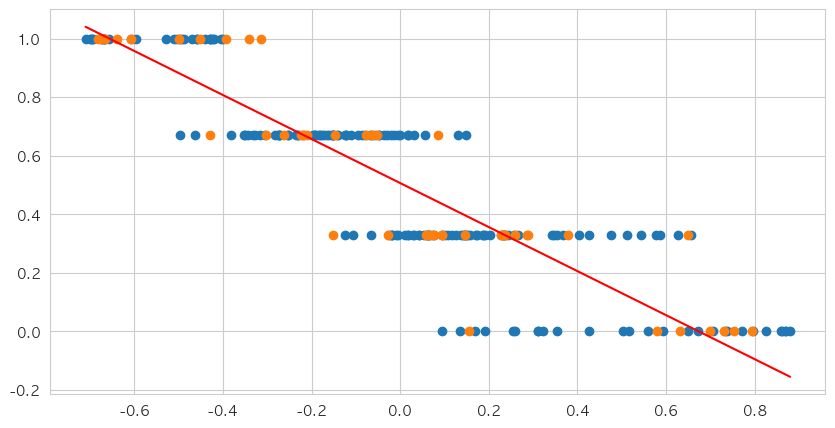

In [93]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만든다.
# point = np.arange(-0.5, 2)

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프
# plt.plot(point, -4.66*point + 0.80, c='red')
plt.plot([-0.71, 0.88], [(-0.71)*lr.coef_+lr.intercept_, (0.88)*lr.coef_+lr.intercept_], c='red')

# 50cm 생선최소값: -0.45 최대값: -0.45
# plt.scatter(50, 1241.8, marker='^')

plt.show()

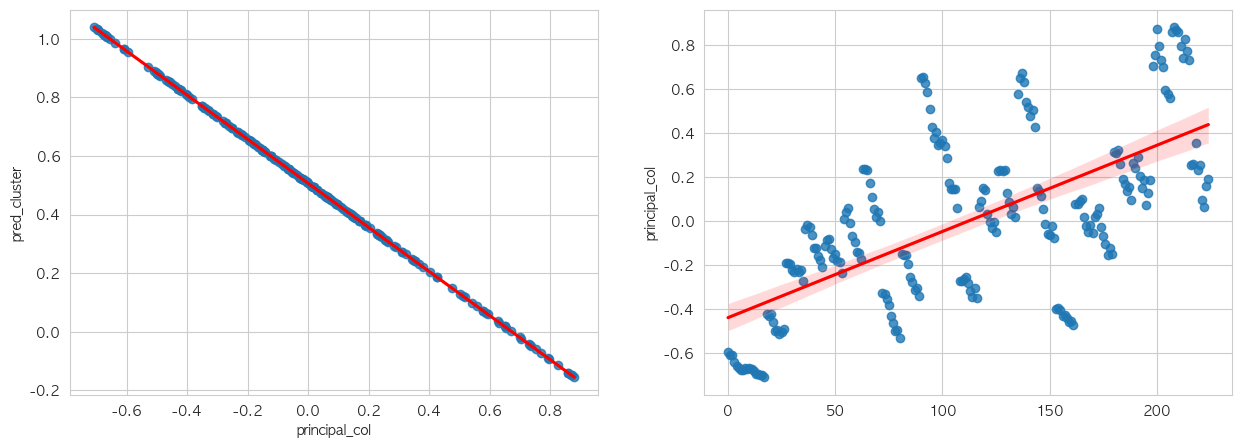

In [94]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선 표시 cf.regression
sns.regplot(
    x = 'principal_col',
    y = 'pred_cluster',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax1,
    fit_reg=True
)

sns.regplot(
    x = df_km_norm_pca.index,
    y = 'principal_col',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax2,
    fit_reg=True
)
plt.show()

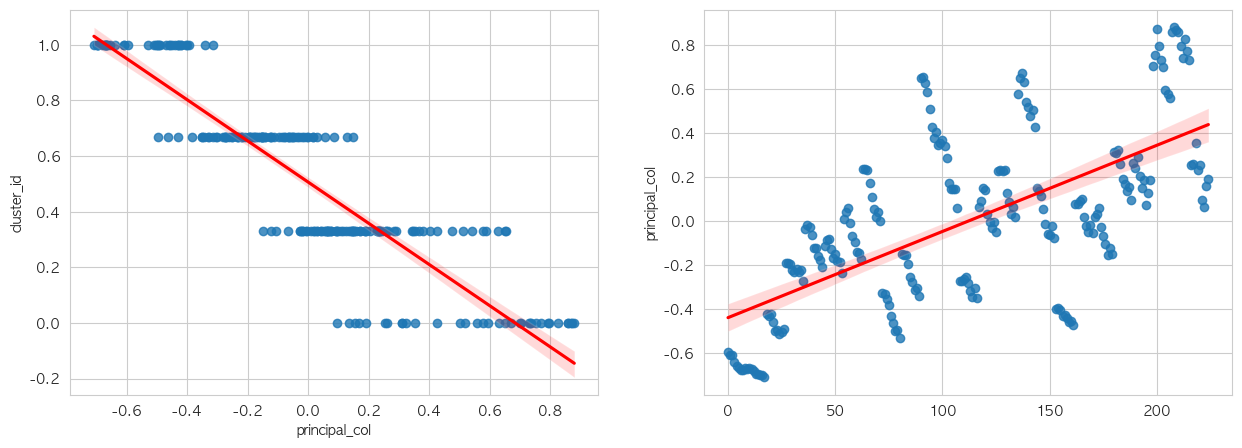

In [95]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선 표시 cf.regression
sns.regplot(
    x = 'principal_col',
    y = 'cluster_id',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax1,
    fit_reg=True
)

sns.regplot(
    x = df_km_norm_pca.index,
    y = 'principal_col',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax2,
    fit_reg=True
)
plt.show()

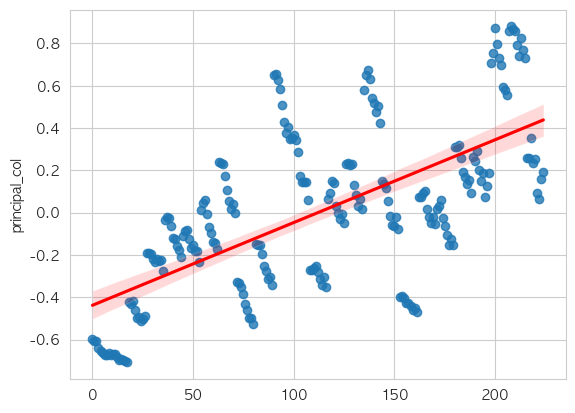

In [96]:
sns.regplot(
    x = df_km_norm_pca.index,
    y = 'principal_col',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    # ax=ax2,
    fit_reg=True
)
plt.show()

In [97]:
df_km_norm_pca

,시군구,년도,principal_col,cluster_id,pred_cluster
0,종로구,2013,-0.595913,1.00,0.954931
1,종로구,2014,-0.607814,1.00,0.963881
2,종로구,2015,-0.607807,1.00,0.963876
3,종로구,2016,-0.639004,1.00,0.987335
4,종로구,2017,-0.656180,1.00,1.000252
...,...,...,...,...,...
220,강동구,2017,0.255453,0.00,0.314709
221,강동구,2018,0.094147,0.33,0.436010
222,강동구,2019,0.065004,0.33,0.457925
223,강동구,2020,0.157287,0.33,0.388529


In [98]:
df_jonro = df_km_norm_pca[df_km_norm_pca['시군구']=='종로구']
df_jonro

,시군구,년도,principal_col,cluster_id,pred_cluster
0,종로구,2013,-0.595913,1.0,0.954931
1,종로구,2014,-0.607814,1.0,0.963881
2,종로구,2015,-0.607807,1.0,0.963876
3,종로구,2016,-0.639004,1.0,0.987335
4,종로구,2017,-0.656180,1.0,1.000252
5,종로구,2018,-0.666075,1.0,1.007693
6,종로구,2019,-0.674862,1.0,1.014301
7,종로구,2020,-0.673550,1.0,1.013314
8,종로구,2021,-0.665726,1.0,1.007430


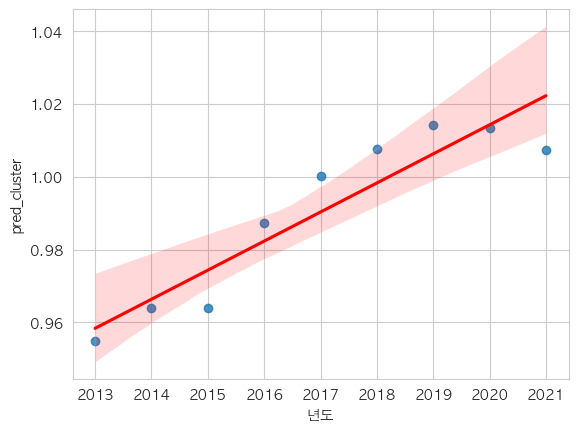

In [99]:
sns.regplot(
    # x = df_jonro.index,
    x = '년도',
    y = 'pred_cluster',
    data=df_jonro,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    # ax=ax2,
    fit_reg=True
)
plt.show()